   # Heart Disease Prediction

In [596]:
# Import our dependencies
import pyspark
from pyspark.sql import SparkSession
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt
#import missingno as msno
import plotly.graph_objs as go
import plotly.express as px
plt.style.use('seaborn-dark')
plt.style.context('grayscale')
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS


C:\Users\swati\AppData\Local\Temp\ipykernel_40632\1314822168.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


In [597]:
#import spark
import findspark
findspark.init()

In [598]:
#import SparkSession
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("heartdisease").getOrCreate()

In [599]:
#reading csv data 
heart = spark.read.csv("heart.csv", header=True)

In [600]:

heart.show()

+---+---+---+------+----+---+-------+--------+----+-------+---+---+-----+------+
|age|sex| cp|trtbps|chol|fbs|restecg|thalachh|exng|oldpeak|slp|caa|thall|output|
+---+---+---+------+----+---+-------+--------+----+-------+---+---+-----+------+
| 63|  1|  3|   145| 233|  1|      0|     150|   0|    2.3|  0|  0|    1|     1|
| 37|  1|  2|   130| 250|  0|      1|     187|   0|    3.5|  0|  0|    2|     1|
| 41|  0|  1|   130| 204|  0|      0|     172|   0|    1.4|  2|  0|    2|     1|
| 56|  1|  1|   120| 236|  0|      1|     178|   0|    0.8|  2|  0|    2|     1|
| 57|  0|  0|   120| 354|  0|      1|     163|   1|    0.6|  2|  0|    2|     1|
| 57|  1|  0|   140| 192|  0|      1|     148|   0|    0.4|  1|  0|    1|     1|
| 56|  0|  1|   140| 294|  0|      0|     153|   0|    1.3|  1|  0|    2|     1|
| 44|  1|  1|   120| 263|  0|      1|     173|   0|      0|  2|  0|    3|     1|
| 52|  1|  2|   172| 199|  1|      1|     162|   0|    0.5|  2|  0|    3|     1|
| 57|  1|  2|   150| 168|  0

In [601]:
heart.printSchema()

root
 |-- age: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- cp: string (nullable = true)
 |-- trtbps: string (nullable = true)
 |-- chol: string (nullable = true)
 |-- fbs: string (nullable = true)
 |-- restecg: string (nullable = true)
 |-- thalachh: string (nullable = true)
 |-- exng: string (nullable = true)
 |-- oldpeak: string (nullable = true)
 |-- slp: string (nullable = true)
 |-- caa: string (nullable = true)
 |-- thall: string (nullable = true)
 |-- output: string (nullable = true)



In [602]:
heart.select("age","cp","fbs").show(3)

+---+---+---+
|age| cp|fbs|
+---+---+---+
| 63|  3|  1|
| 37|  2|  0|
| 41|  1|  0|
+---+---+---+
only showing top 3 rows



In [603]:
heart.createOrReplaceTempView('heart')
heart

DataFrame[age: string, sex: string, cp: string, trtbps: string, chol: string, fbs: string, restecg: string, thalachh: string, exng: string, oldpeak: string, slp: string, caa: string, thall: string, output: string]

In [604]:
result = spark.sql("SELECT * FROM heart LIMIT 5")
result.show()

+---+---+---+------+----+---+-------+--------+----+-------+---+---+-----+------+
|age|sex| cp|trtbps|chol|fbs|restecg|thalachh|exng|oldpeak|slp|caa|thall|output|
+---+---+---+------+----+---+-------+--------+----+-------+---+---+-----+------+
| 63|  1|  3|   145| 233|  1|      0|     150|   0|    2.3|  0|  0|    1|     1|
| 37|  1|  2|   130| 250|  0|      1|     187|   0|    3.5|  0|  0|    2|     1|
| 41|  0|  1|   130| 204|  0|      0|     172|   0|    1.4|  2|  0|    2|     1|
| 56|  1|  1|   120| 236|  0|      1|     178|   0|    0.8|  2|  0|    2|     1|
| 57|  0|  0|   120| 354|  0|      1|     163|   1|    0.6|  2|  0|    2|     1|
+---+---+---+------+----+---+-------+--------+----+-------+---+---+-----+------+



In [605]:
result.columns

['age',
 'sex',
 'cp',
 'trtbps',
 'chol',
 'fbs',
 'restecg',
 'thalachh',
 'exng',
 'oldpeak',
 'slp',
 'caa',
 'thall',
 'output']

In [606]:
count_greater_200 = spark.sql("SELECT COUNT(output) as male FROM heart WHERE chol > 200 and sex =1").show()


+----+
|male|
+----+
| 170|
+----+



In [607]:
columns = ["age", "sex","cp","fbs","restecg","thalahh","exng","oldpeak","slp","caa","thall","output"]

In [608]:
pandasDF = heart.toPandas()

#print(pandasDF)

In [609]:
pandasDF.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303,303,303,303,303,303,303,303,303,303,303,303,303,303
unique,41,2,4,49,152,2,3,91,2,40,3,5,4,2
top,58,1,0,120,204,0,1,162,0,0,2,0,2,1
freq,19,207,143,37,6,258,152,11,204,99,142,175,166,165


In [610]:
df1=pd.read_csv("o2Saturation.csv")

In [611]:
data = pd.concat([pandasDF,df1], axis=1)

In [612]:
data.rename(columns={"98.6": "Saturasyon"}, inplace=True)

In [613]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,Saturasyon
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,98.6
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,98.6
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,98.6
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,98.1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,97.5


C:\Users\swati\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


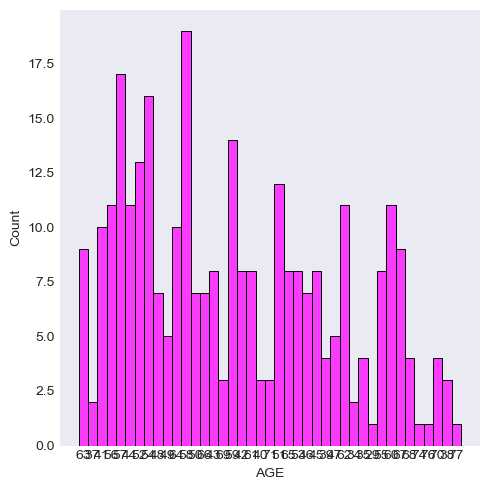

In [614]:
sns.displot(data=pandasDF, x="age", color="magenta")
plt.xlabel("AGE")
plt.show()

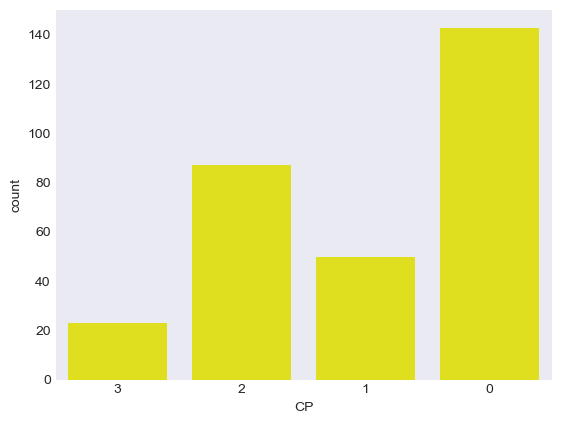

In [615]:
sns.countplot(data= pandasDF, x="cp", color="yellow")
plt.xlabel("CP")
plt.show()

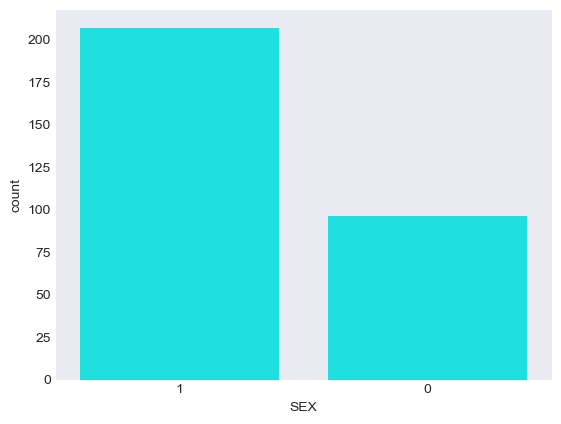

In [616]:
sns.countplot(data= pandasDF, x="sex", color="cyan")
plt.xlabel("SEX")
plt.show()

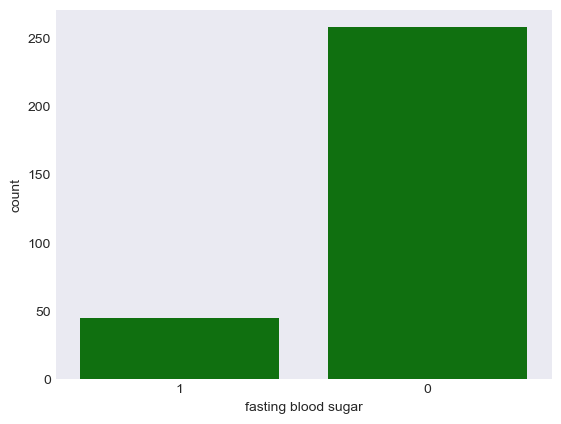

In [617]:
sns.countplot(data= pandasDF, x="fbs", color="green")
plt.xlabel("fasting blood sugar")
plt.show()


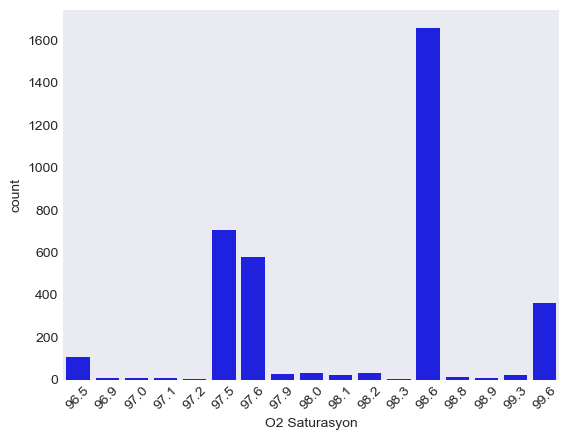

In [618]:
sns.countplot(data= data, x="Saturasyon", color="blue")
plt.xticks(rotation=45)
plt.xlabel("O2 Saturasyon")
plt.show()

In [619]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB 

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

In [620]:
data_len=len(pandasDF)
data_len

303

# Logistic Regression

In [621]:
X_train = pandasDF.drop(labels = "output", axis = 1)
y_train = pandasDF["output"]

In [622]:
y_train = pandasDF["output"]
y_train

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: object

In [623]:

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.33, random_state = 42)

In [624]:
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))
#print("test",len(test))

X_train 203
X_test 100
y_train 203
y_test 100


In [625]:
logreg = LogisticRegression()

In [626]:
logreg.fit(X_train, y_train)

C:\Users\swati\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [627]:
acc_log_train = round(logreg.score(X_train, y_train)*100,2) 
acc_log_test = round(logreg.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 89.66
Testing Accuracy: % 80.0


# Naive Bayes

In [633]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.25, random_state = 125)

In [634]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,y_train)

Y_pred_nb = nb.predict(X_test)

In [635]:
Y_pred_nb.shape

(38,)

In [636]:
score_nb = round(accuracy_score(Y_pred_nb,y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 81.58 %


In [637]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred_nb,
                            target_names=["blue", "red"]))

              precision    recall  f1-score   support

        blue       0.86      0.82      0.84        22
         red       0.76      0.81      0.79        16

    accuracy                           0.82        38
   macro avg       0.81      0.82      0.81        38
weighted avg       0.82      0.82      0.82        38



A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

In [638]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, Y_pred_nb)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[18  4]
 [ 3 13]]

True Positives(TP) =  18

True Negatives(TN) =  13

False Positives(FP) =  4

False Negatives(FN) =  3


<Axes: >

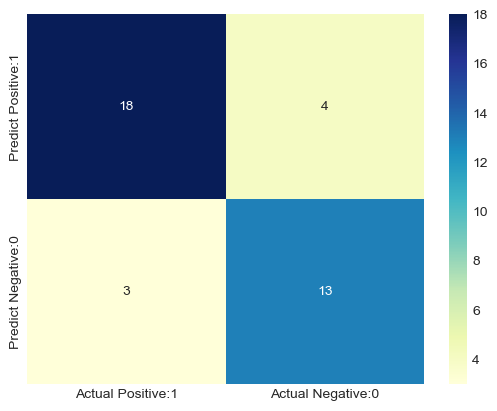

In [639]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Decision Tree

In [640]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,y_train)
Y_pred_dt = dt.predict(X_test)

In [641]:
print(Y_pred_dt.shape)

(38,)


In [642]:
score_dt = round(accuracy_score(Y_pred_dt,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 92.11 %


In [643]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred_dt,
                            target_names=["blue", "red"]))

              precision    recall  f1-score   support

        blue       0.95      0.91      0.93        22
         red       0.88      0.94      0.91        16

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



# SVM

In [644]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, y_train)

Y_pred_svm = sv.predict(X_test)

In [645]:
Y_pred_svm.shape

(38,)

In [646]:
score_svm = round(accuracy_score(Y_pred_svm,y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 92.11 %


In [647]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred_svm,
                            target_names=["blue", "red"]))

              precision    recall  f1-score   support

        blue       0.95      0.91      0.93        22
         red       0.88      0.94      0.91        16

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



# KNeighbors

In [648]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
Y_pred_knn=knn.predict(X_test)

In [649]:
Y_pred_knn.shape

(38,)

In [650]:
score_knn = round(accuracy_score(Y_pred_knn,y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 60.53 %


In [651]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred_svm,
                            target_names=["blue", "red"]))

              precision    recall  f1-score   support

        blue       0.95      0.91      0.93        22
         red       0.88      0.94      0.91        16

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



In [652]:
from sklearn import metrics

kn =10
Accuracy =np.zeros((kn-1))

for number in range(1,kn):
    neighbors =KNeighborsClassifier(n_neighbors = number)
    neighbors.fit(X_train,y_train)
    yhat =neighbors.predict(X_test)
    Accuracy[number-1] =metrics.accuracy_score(y_test, yhat)
    
Accuracy

array([0.52631579, 0.57894737, 0.57894737, 0.47368421, 0.65789474,
       0.65789474, 0.60526316, 0.60526316, 0.57894737])

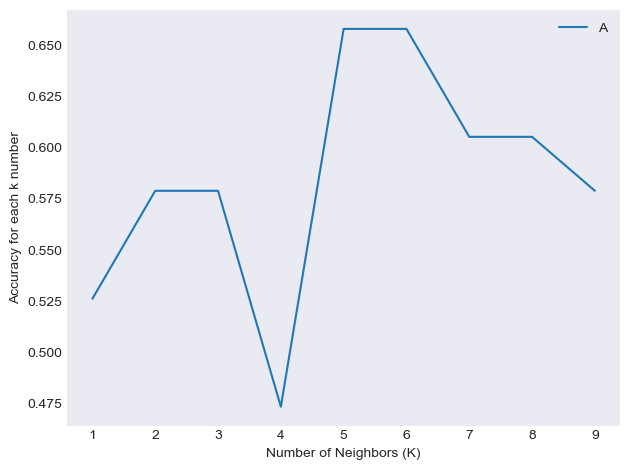

In [653]:
plt.plot(range(1,kn), Accuracy)
plt.legend('Accuracy')
plt.ylabel('Accuracy for each k number')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

# Output final score

In [654]:
scores = [acc_log_train, score_nb, score_dt, score_svm, score_knn ]
algorithms = ["Logistic Regression","Naive Bayes", "Decision Tree", "SVM","KNeighbours"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 89.66 %
The accuracy score achieved using Naive Bayes is: 81.58 %
The accuracy score achieved using Decision Tree is: 92.11 %
The accuracy score achieved using SVM is: 92.11 %
The accuracy score achieved using KNeighbours is: 60.53 %


# Neural Network 

In [561]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("heart.csv")
application_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [562]:
# Drop the non-beneficial ID columns, 'exng' and 'slp'.
application_df = application_df.drop(columns = ['exng', 'slp'])

In [563]:
for i in application_df.columns:
    print(i, len(application_df[i].unique()))

age 41
sex 2
cp 4
trtbps 49
chol 152
fbs 2
restecg 3
thalachh 91
oldpeak 40
caa 5
thall 4
output 2


In [564]:
# Look at APPLICATION_TYPE value counts for binning
app_counts = application_df['cp'].value_counts()
app_counts

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

In [565]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(app_counts[app_counts<500].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['cp'].replace(app,"chest pain")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
0             143
2              87
1              50
chest pain     23
Name: count, dtype: int64

In [566]:
# Look at CLASSIFICATION value counts for binning
Fbs_counts = application_df['fbs'].value_counts()
Fbs_counts

fbs
0    258
1     45
Name: count, dtype: int64

In [567]:
# Convert categorical data to numeric with `pd.get_dummies`
dummies = pd.get_dummies(application_df)

In [568]:
# Split our preprocessed data into our features and target arrays
y = dummies['output'].values
X = dummies.drop(columns='output').values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 78)

In [569]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Compile, Train and Evaluate the Model

In [570]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = X_train_scaled.shape[1]

# X shape/ input feature/columns is 43 * 2/3 is 86-129 so chose 80 for the first hidden node
hidden_node1 = 80
hidden_node2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_node1, activation='relu', input_dim=input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_node2, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 80)                1280      
                                                                 
 dense_33 (Dense)            (None, 30)                2430      
                                                                 
 dense_34 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3741 (14.61 KB)
Trainable params: 3741 (14.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [571]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [572]:

# Create a callback that saves the model's weights every five epochs
# Import checkpoint dependencies
# adding this cell for step 8 Create a callback that saves the model's weights every five epochs.
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define checkpoints variables
os.makedirs('checkpoints/', exist_ok=True)
checkpoint_path= 'checkpoints/weights.{epoch}.hdf5'

# Create callback
cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                              verbose=1,
                              save_weights_only=True,
                              save_freq='epoch',
                              period=5)
# Create a callback that saves the model's weights every five epochs
# Import checkpoint dependencies
# adding this cell for step 8 Create a callback that saves the model's weights every five epochs.
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define checkpoints variables
os.makedirs('checkpoints/', exist_ok=True)
checkpoint_path= 'checkpoints/weights.{epoch}.hdf5'

# Create callback
cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                              verbose=1,
                              save_weights_only=True,
                              save_freq='epoch',
                              period=5)

In [573]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
8/8 [==============================] - 1s 4ms/step - loss: 0.6880 - accuracy: 0.4758
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6012 - accuracy: 0.6784
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 0.5366 - accuracy: 0.8062
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4856 - accuracy: 0.8458
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4435 - accuracy: 0.8634
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 0.4082 - accuracy: 0.8458
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 0.3824 - accuracy: 0.8414
Epoch 8/100
8/8 [==============================] - 0s 5ms/step - loss: 0.3627 - accuracy: 0.8370
Epoch 9/100
8/8 [==============================] - 0s 5ms/step - loss: 0.3461 - accuracy: 0.8370
Epoch 10/100
8/8 [==============================] - 0s 5ms/step - loss: 0.3327 - accuracy: 0.8502
Epoch 11/100
8/8 [===========

8/8 [==============================] - 0s 2ms/step - loss: 0.0783 - accuracy: 0.9824
Epoch 85/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0762 - accuracy: 0.9780
Epoch 86/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0739 - accuracy: 0.9868
Epoch 87/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0722 - accuracy: 0.9868
Epoch 88/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0714 - accuracy: 0.9824
Epoch 89/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0705 - accuracy: 0.9824
Epoch 90/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0686 - accuracy: 0.9868
Epoch 91/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0666 - accuracy: 0.9868
Epoch 92/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0657 - accuracy: 0.9912
Epoch 93/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0652 - accuracy: 0.9912
Epoch 94/100
8/8 [===============

In [574]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f'Loss: {model_loss}, Accuracy: {model_accuracy}')

3/3 - 0s - loss: 0.8663 - accuracy: 0.7368 - 252ms/epoch - 84ms/step
Loss: 0.8663225769996643, Accuracy: 0.7368420958518982


<Axes: >

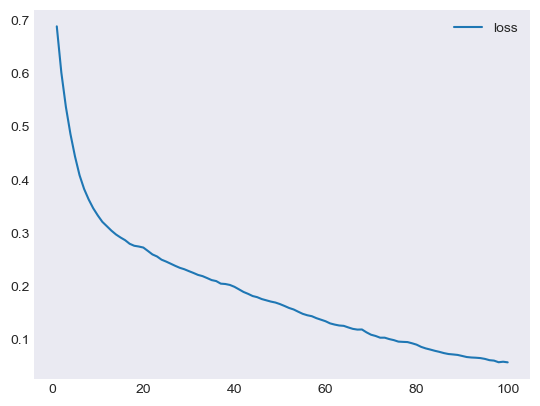

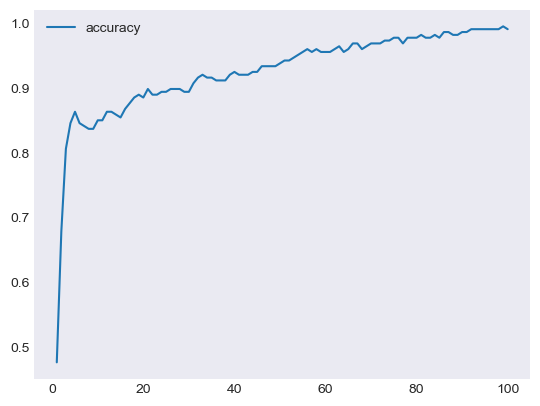

In [575]:
# Create a DataFrame containing training history of the 1st model
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y='loss')

# Plot the accuracy
history_df.plot(y='accuracy')

In [576]:
# Define the 2nd model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = X_train_scaled.shape[1]
# X shape/ input feature/columns is 43 * 2 is 86 so chose 80 for the first hidden node
hidden_node1 = 90
hidden_node2 = 30
# Add a third hidden layer
hidden_node3 = 20

nn_model_2 = tf.keras.models.Sequential()

# First hidden layer
nn_model_2.add(tf.keras.layers.Dense(units=hidden_node1, activation='tanh', input_dim=input_features,))

# Second hidden layer
nn_model_2.add(tf.keras.layers.Dense(units=hidden_node2, activation='tanh'))

# Third hidden layer
nn_model_2.add(tf.keras.layers.Dense(units=hidden_node3, activation='tanh'))


# Output layer (output is 1 and sigmoid because it's binary classifier)
nn_model_2.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_model_2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 90)                1440      
                                                                 
 dense_36 (Dense)            (None, 30)                2730      
                                                                 
 dense_37 (Dense)            (None, 20)                620       
                                                                 
 dense_38 (Dense)            (None, 1)                 21        
                                                                 
Total params: 4811 (18.79 KB)
Trainable params: 4811 (18.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [577]:
# Compile the  2nd model
nn_model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [578]:
# Train the 2nd model
fit_model_2 = nn_model_2.fit(X_train_scaled, y_train, epochs=50,callbacks=[cp_callback])

Epoch 1/50
8/8 [==============================] - 2s 4ms/step - loss: 0.6884 - accuracy: 0.5815
Epoch 2/50
8/8 [==============================] - 0s 3ms/step - loss: 0.4775 - accuracy: 0.7974
Epoch 3/50
8/8 [==============================] - 0s 3ms/step - loss: 0.4012 - accuracy: 0.8062
Epoch 4/50
8/8 [==============================] - 0s 3ms/step - loss: 0.3660 - accuracy: 0.8282
Epoch 5/50
1/8 [==>...........................] - ETA: 0s - loss: 0.3587 - accuracy: 0.8438
Epoch 5: saving model to checkpoints\weights.5.hdf5
8/8 [==============================] - 0s 9ms/step - loss: 0.3462 - accuracy: 0.8414
Epoch 6/50
8/8 [==============================] - 0s 4ms/step - loss: 0.3308 - accuracy: 0.8546
Epoch 7/50
8/8 [==============================] - 0s 6ms/step - loss: 0.3220 - accuracy: 0.8590
Epoch 8/50
8/8 [==============================] - 0s 5ms/step - loss: 0.3173 - accuracy: 0.8678
Epoch 9/50
8/8 [==============================] - 0s 5ms/step - loss: 0.3095 - accuracy: 0.8678
Epo

In [579]:
# Evaluate the 2nd model using the test data
model_loss, model_accuracy = nn_model_2.evaluate(X_test_scaled,y_test,verbose=2)
print(f'Loss: {model_loss}, Accuracy: {model_accuracy}')

3/3 - 0s - loss: 0.5778 - accuracy: 0.8026 - 282ms/epoch - 94ms/step
Loss: 0.57783442735672, Accuracy: 0.8026315569877625


<Axes: >

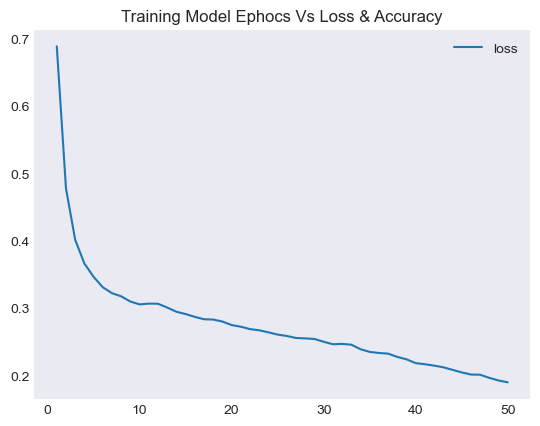

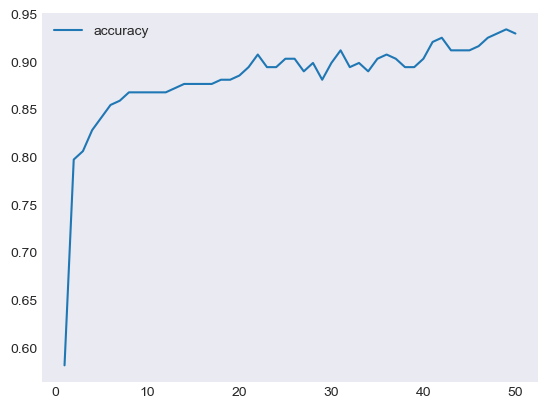

In [580]:
# Create a DataFrame containing training history of the 2nd model
history_df = pd.DataFrame(fit_model_2.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y='loss', title='Training Model Ephocs Vs Loss & Accuracy')

# Plot the accuracy
history_df.plot(y='accuracy')

# Conclusion :
    

This is not bad, however depending on the context of where this ML pipeline will be utilized, it might be best to sacrifice accuracy in favor of recall or precision optimization.
In the event the goal is to provide doctors or patients with a tool to identify heart attack risk in every patient who has a true value of "risk", it might be best to ensure the recall is as close to 100% as possible.   
    
While this is a very popular dataset on Kaggle, and served as a great training dataset in a class setting, there was no source or explanation on where the data came from. It could have been randomly generated or from a single hospital. Fortunately, this was constructed in a classroom setting for educational purposes and not for any real-world healthcare applications. Going forward, assessing the source of datasets before conducting projects or building ML pipelines will be critical.    